In [1]:
# 處理 array
import numpy as np

# 產生隨機 list，用於隨機產生出一組合法解
import random

# data visualisation and manipulation
# 畫收斂圖
import matplotlib.pyplot as plt

In [2]:
# 15 weights and profits for a knapsack of capacity 750, with an optimal profit of 1458(拿總重749).

# optimal selection of weights.
# s = np.array([1,0,1,0,1,0,1,1,1,0,0,0,0,1,1])

global c,w,p,n; 
w=[]
p=[]

def init():   #初始化函数

    # the knapsack capacity.
    file = open('p07_c.txt', 'r')
    c = int(file.read())
    file.close()
    
    # the weights of the objects. 
    file = open('p07_w.txt', 'r')
    for line in file.readlines():        
        w.append(int(line))
    file.close

    # the profits of each object.
    file = open('p07_p.txt', 'r')
    for line in file.readlines():        
        p.append(int(line))
    file.close
    
    return c,p,w

c,p,w = init()
print("capacity:",c)
print("profit:",p)
print("weight:",w)

# 15 objects len(w)
n = len(w) 
print("item 數:",n)

capacity: 750
profit: [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]
weight: [70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]
item 數: 15


In [3]:
# STEP 1 Initial:
# 隨機產生出一組合法解 (至多2的15次方種可能解)

def ramdomSolution():
    # 紀錄物品拿取狀態 不拿:0 拿:1
    item_status = [ random.randint(0,1) for _ in range(n)]
    #item_status = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    total_weight = 0
    is_solution = 0
    profit = 0

    while(is_solution == 0):
        for i in range(n):
            if(item_status[i] == 1):
                total_weight += w[i]
                profit += p[i]

        if(total_weight <= c):
            is_solution = 1
        else: 
            item_status = [ random.randint(0,1) for _ in range(n)]
            total_weight = 0
            profit = 0
            
    return item_status, profit ,total_weight

In [4]:
# STEP 2 Transition: 隨機 / 左右 移動
# 找鄰近解
# 採隨機移動 (1)將任一位置 0換成 1 1換成 0 
# 採左右移動 (2)將任兩不同值位置 0、1對調  

def getNeighbors(solution, profit, weight):
    
    neighbors = []
    
    # 採隨機移動 (1)將任一位置 0換成 1 1換成 0 
    for i in range(len(solution)):
        
        neighbor_profit = profit
        neighbor_weight = weight
        neightbor_sol = solution.copy()
        
        if(neightbor_sol[i] == 0):
            
            neightbor_sol[i]=1
            neighbor_profit += p[i]
            neighbor_weight += w[i]
            
            # 檢查鄰近解是否符合法解(多拿一物品是否超過背包容量)
            if(neighbor_weight <= c):
                #存鄰近合法解
                neighbors.append([neightbor_sol, neighbor_profit, neighbor_weight])
        else: 
            neightbor_sol[i] = 0
            neighbor_profit -= p[i]
            neighbor_weight -= w[i]
            # 少拿一物品必符合和法解，存鄰近合法解
            neighbors.append([neightbor_sol, neighbor_profit, neighbor_weight])
            
    # 採左右移動 (2)將任兩不同值位置 0、1對調  
    for i in range(len(solution)):
        for j in range(i+1, len(solution)):
            
            neighbor_profit = profit
            neighbor_weight = weight
            neightbor_sol = solution.copy()
            
            if(solution[i] != solution[j]):
                
                neightbor_sol[i] = solution[j]
                neightbor_sol[j] = solution[i]
                
                if(neightbor_sol[i]==1):
                    neighbor_profit = neighbor_profit + p[i] - p[j]
                    neighbor_weight = neighbor_weight + w[i] - w[j]
                else:
                    neighbor_profit = neighbor_profit - p[i] + p[j]
                    neighbor_weight = neighbor_weight - w[i] + w[j]
                    
                # 檢查鄰近解是否符合法解(拿一物品放回一物品後，是否超過背包容量)
                if(neighbor_weight <= c):
                    #存鄰近合法解
                    neighbors.append([neightbor_sol, neighbor_profit, neighbor_weight])
                
    return neighbors
    
#getNeighbors([0,1,1,0],274,143)


In [5]:
# STEP 3 Evalution:
# 找最佳鄰近解
def getBestNeighbor(solution):
    
    neighbors_arr = np.array(solution,dtype=object)

    #print(neighbors_arr[:,1])
    #print(max(neighbors_arr[:,1])) profit 行中找最大值
    maxProfit = max(neighbors_arr[:,1])

    # 找到最大獲利解的索引值 #print(index_y[0],index_x[0])
    index_y,index_x = np.where(neighbors_arr == maxProfit)
    indexMax = index_y[0]
    
    
    bestNeighborSolution = neighbors_arr[indexMax][0]
    bestNeighborProfit = neighbors_arr[indexMax][1]
    bestNeighborWeight = neighbors_arr[indexMax][2]
    
    return bestNeighborSolution,bestNeighborProfit,bestNeighborWeight
 
#getBestNeighbor(getNeighbors([0,1,1,0],274,143))
    

In [6]:
def hillClimbing(iteration):
    
    # 隨機產生出一組合法解 (至多2的15次方種可能解)
    currentSolution, currrentProfit, currentWeight = ramdomSolution()
    print("新解: " + str(currentSolution))
    print("新解獲利: " + str(currrentProfit))
    print("新解總重: " + str(currentWeight))
    
    # 找鄰近解
    neighborsSol = getNeighbors(currentSolution,currrentProfit,currentWeight)
    # 找最佳鄰近解
    bestNeighborSolution, bestNeighborProfit, bestNeighborWeight= getBestNeighbor(neighborsSol)
    print("\n最佳鄰近解: " + str(bestNeighborSolution))
    print("最佳鄰近解獲利: " + str(bestNeighborProfit))
    print("最佳鄰近解總重: " + str(bestNeighborWeight))
    
    profit_history = []
    
    for i in range(iteration):
        
        # STEP 4 Determination
        # 比較最佳鄰近解是否優於原來的解，若優於原來的解則更新，若無則維持原來的解。
        if(bestNeighborProfit >= currrentProfit):
            
            currentSolution = bestNeighborSolution
            currrentProfit = bestNeighborProfit
            currentWeight = bestNeighborWeight
            
            # 鄰近解比現有解較佳就持續迭代更新找更多鄰近解，直到沒有鄰近解優於現有解
            # 找鄰近解
            neighborsSol = getNeighbors(currentSolution,currrentProfit,currentWeight)
            # 找最佳鄰近解
            bestNeighborSolution, bestNeighborProfit, bestNeighborWeight= getBestNeighbor(neighborsSol)
            print("\n第" + str(i+1) + "輪: ")
            print("更多最佳鄰近解: " + str(bestNeighborSolution))
            print("更多最佳鄰近解獲利: " + str(bestNeighborProfit))
            print("更多最佳鄰近解總重: " + str(bestNeighborWeight))
            
        # 紀錄每次迭代的最佳獲利
        profit_history.append(currrentProfit)
        
    return currentSolution, currrentProfit, currentWeight, profit_history
            
iteration = 500 

finalSolution, finalProfit, finalWeight, profit_history= hillClimbing(iteration)
print("\n最後解: " + str(finalSolution))
print("最後獲利: " + str(finalProfit))
print("最後總重: " + str(finalWeight))

新解: [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
新解獲利: 683
新解總重: 357

最佳鄰近解: [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
最佳鄰近解獲利: 923
最佳鄰近解總重: 477

第1輪: 
更多最佳鄰近解: [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1]
更多最佳鄰近解獲利: 1144
更多最佳鄰近解總重: 592

第2輪: 
更多最佳鄰近解: [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]
更多最佳鄰近解獲利: 1358
更多最佳鄰近解總重: 705

第3輪: 
更多最佳鄰近解: [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]
更多最佳鄰近解獲利: 1433
更多最佳鄰近解總重: 745

第4輪: 
更多最佳鄰近解: [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
更多最佳鄰近解獲利: 1443
更多最佳鄰近解總重: 748

第5輪: 
更多最佳鄰近解: [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
更多最佳鄰近解獲利: 1437
更多最佳鄰近解總重: 746

最後解: [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
最後獲利: 1443
最後總重: 748


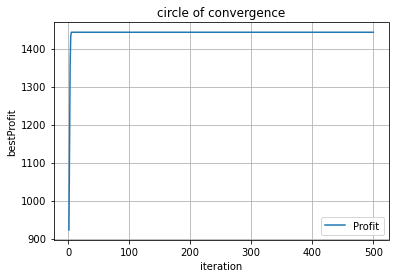

In [7]:
def plotIteration(profit_history, iteration):
    
    iterationTime = iteration

    plt.title('circle of convergence')
    plt.plot(range(1, iterationTime + 1), profit_history, label='Profit')
    plt.xlabel('iteration')
    plt.ylabel('bestProfit')
    plt.legend()
    plt.grid()
    plt.show()
    
# 畫收斂圖
plotIteration(profit_history, iteration)